In [39]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
#import Libraries
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [41]:
#Load dataset
dataset_path = '/content/drive/MyDrive/cat_dogs_pandas(100)'
img_size = 64

In [42]:
#Train the Data
train_data = []

for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            try:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (img_size, img_size))
                train_data.append((img, label))
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

print(f"Total images loaded: {len(train_data)}")

Total images loaded: 300


In [45]:
#Use KNN Model with 5 fold Validation
random.shuffle(train_data)

num_folds = 5
fold_size = len(train_data) // num_folds
folds = [train_data[i * fold_size: (i + 1) * fold_size] for i in range(num_folds)]

def euclidean_distance(img1, img2):
    try:
        return np.sqrt(np.sum((img1.flatten() - img2.flatten())**2))
    except Exception as e:
        print(f"Error calculating distance: {e}")
        return float('inf')

accuracies = {k: [] for k in range(1, 31)}

for k in range(1, 21):
    print(f"Validation accuracy for k={k}:")

    for fold_num in range(num_folds):
        validation_fold = folds[fold_num]
        training_folds = [folds[i] for i in range(num_folds) if i != fold_num]
        training_data = [item for sublist in training_folds for item in sublist]

        correct_predictions = 0
        total_predictions = len(validation_fold)

        for val_img, val_label in validation_fold:
            distances = []
            for train_img, train_label in training_data:
                try:
                    distance = euclidean_distance(val_img, train_img)
                    distances.append((distance, train_label))
                except Exception as e:
                    print(f"Skipped a corrupted training image: {e}")

            if distances:
                distances.sort(key=lambda x: x[0])
                nearest_neighbors = [label for _, label in distances[:k]]
                predicted_label = max(set(nearest_neighbors), key=nearest_neighbors.count)

                if predicted_label == val_label:
                    correct_predictions += 1

        accuracy = correct_predictions / total_predictions * 100
        accuracies[k].append(accuracy)

        print(f"Fold {fold_num + 1} validation accuracy = {accuracy:.3f}%")

    print("-" * 38)

Validation accuracy for k=1:
Fold 1 validation accuracy = 43.333%
Fold 2 validation accuracy = 48.333%
Fold 3 validation accuracy = 38.333%
Fold 4 validation accuracy = 35.000%
Fold 5 validation accuracy = 28.333%
--------------------------------------
Validation accuracy for k=2:
Fold 1 validation accuracy = 36.667%
Fold 2 validation accuracy = 51.667%
Fold 3 validation accuracy = 41.667%
Fold 4 validation accuracy = 36.667%
Fold 5 validation accuracy = 36.667%
--------------------------------------
Validation accuracy for k=3:
Fold 1 validation accuracy = 36.667%
Fold 2 validation accuracy = 48.333%
Fold 3 validation accuracy = 40.000%
Fold 4 validation accuracy = 33.333%
Fold 5 validation accuracy = 38.333%
--------------------------------------
Validation accuracy for k=4:
Fold 1 validation accuracy = 43.333%
Fold 2 validation accuracy = 40.000%
Fold 3 validation accuracy = 46.667%
Fold 4 validation accuracy = 31.667%
Fold 5 validation accuracy = 43.333%
---------------------------

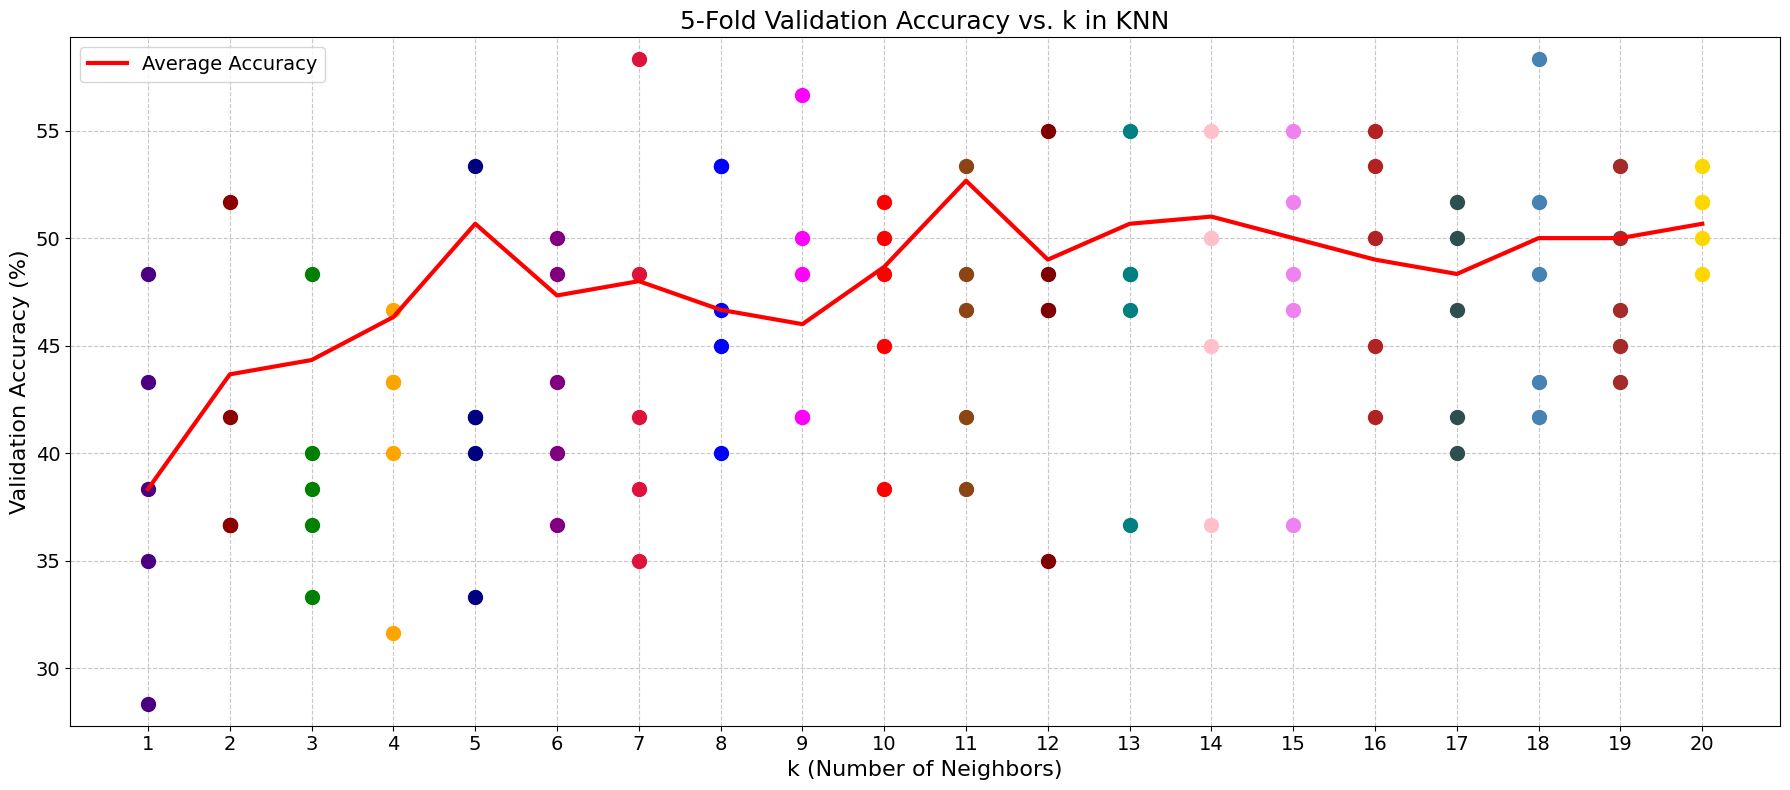

In [47]:
num_folds = 5

colors = [
    'indigo', 'darkred', 'green', 'orange', 'navy', 'purple', 'crimson', 'blue',
    'magenta', 'red', 'saddlebrown', 'maroon', 'teal', 'pink', 'violet',
    'firebrick', 'darkslategray', 'steelblue', 'brown', 'gold'
]

plt.figure(figsize=(18, 8))

# Plot for k = 1 to 20 (make sure average_points has at least 20 points)
for k in range(1, 21):
    plt.plot([k] * num_folds, accuracies[k], marker='o', markersize=10, linestyle='', color=colors[k - 1])

# Plot average points for k=1 to 20 only
plt.plot(range(1, 21), average_points[:20], color='red', linestyle='-', linewidth=3, label='Average Accuracy')

# Compute y limits only for the k range used (1 to 20)
min_accuracy = min(min(accuracies[k]) for k in range(1, 21)) - 1
max_accuracy = max(max(accuracies[k]) for k in range(1, 21)) + 1
plt.ylim(min_accuracy, max_accuracy)

plt.title('5-Fold Validation Accuracy vs. k in KNN', fontsize=18)
plt.xlabel('k (Number of Neighbors)', fontsize=16)
plt.ylabel('Validation Accuracy (%)', fontsize=16)

plt.xticks(range(1, 21), fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()
